In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats.contingency import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score


In [2]:
#read data
df = pd.read_csv('Watson_data.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.shape

(7043, 19)

In [5]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,108.15,Yes


In [6]:
df['Partner'] = df.Partner.map( lambda x: '1' if x == 'Yes' else '0')

In [7]:
df['Dependents'] = df.Dependents.map( lambda x: '1' if x == 'Yes' else '0')

In [8]:
df['MultipleLines'] = df.MultipleLines.map( lambda x: '1' if x == 'Yes' else '0')
df['OnlineSecurity'] = df.OnlineSecurity.map( lambda x: '1' if x == 'Yes' else '0')
df['OnlineBackup'] = df.OnlineBackup.map( lambda x: '1' if x == 'Yes' else '0')
df['DeviceProtection'] = df.DeviceProtection.map( lambda x: '1' if x == 'Yes' else '0')
df['TechSupport'] = df.TechSupport.map( lambda x: '1' if x == 'Yes' else '0')
df['StreamingTV'] = df.StreamingTV.map( lambda x: '1' if x == 'Yes' else '0')
df['StreamingMovies'] = df.StreamingMovies.map( lambda x: '1' if x == 'Yes' else '0')
df['PaperlessBilling'] = df.PaperlessBilling.map( lambda x: '1' if x == 'Yes' else '0')
df['Churn'] = df.Churn.map( lambda x: '1' if x == 'Yes' else '0')
df['gender'] = df.gender.map( lambda x: '1' if x == 'Male' else '0')

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
Internet=pd.get_dummies(df['InternetService'],drop_first=True)
pm=pd.get_dummies(df['PaymentMethod'],drop_first=True)
print(pm)

      Credit card (automatic)  Electronic check  Mailed check
0                           0                 1             0
1                           0                 0             1
2                           0                 0             1
3                           0                 0             0
4                           0                 1             0
...                       ...               ...           ...
7038                        0                 0             1
7039                        1                 0             0
7040                        0                 1             0
7041                        0                 0             1
7042                        0                 0             0

[7043 rows x 3 columns]


In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,DSL,0,1,0,0,0,0,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,0,DSL,1,0,1,0,0,0,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,0,DSL,1,1,0,0,0,0,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,DSL,1,0,1,1,0,0,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,0,Fiber optic,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1


In [23]:
#view variables
print(Internet)

      Fiber optic  No
0               0   0
1               0   0
2               0   0
3               0   0
4               1   0
...           ...  ..
7038            0   0
7039            1   0
7040            0   0
7041            1   0
7042            1   0

[7043 rows x 2 columns]


In [13]:
df=pd.concat([df,Internet,pm],axis=1)

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,0,1,0,1,0,DSL,0,1,...,1,Electronic check,29.85,29.85,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,0,DSL,1,0,...,0,Mailed check,56.95,1889.5,0,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,0,DSL,1,1,...,1,Mailed check,53.85,108.15,1,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,DSL,1,0,...,0,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,0
4,9237-HQITU,0,0,0,0,2,0,Fiber optic,0,0,...,1,Electronic check,70.70,151.65,1,1,0,0,1,0


In [14]:
df.drop(['customerID','InternetService','PaymentMethod'],axis=1,inplace=True)

In [15]:
df.tail(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,Credit card (automatic),Electronic check,Mailed check
7038,1,0,1,1,24,1,1,0,1,1,...,1,1,84.80,1990.5,0,0,0,0,0,1
7039,0,0,1,1,72,1,0,1,1,0,...,1,1,103.20,7362.9,0,1,0,1,0,0
7040,0,0,1,1,11,0,1,0,0,0,...,0,1,29.60,346.45,0,0,0,0,1,0
7041,1,1,1,0,4,1,0,0,0,0,...,0,1,74.40,306.6,1,1,0,0,0,1
7042,1,0,0,0,66,0,1,0,1,1,...,1,1,105.65,6844.5,0,1,0,0,0,0


In [16]:
df.dtypes

gender                      object
SeniorCitizen                int64
Partner                     object
Dependents                  object
tenure                       int64
MultipleLines               object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
PaperlessBilling            object
MonthlyCharges             float64
TotalCharges                object
Churn                       object
Fiber optic                  uint8
No                           uint8
Credit card (automatic)      uint8
Electronic check             uint8
Mailed check                 uint8
dtype: object

In [17]:
cols = df.columns[df.dtypes.eq('object')]
print(cols)

Index(['gender', 'Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'TotalCharges', 'Churn'],
      dtype='object')


In [18]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df = df.astype({"Churn": int})

In [139]:
df.dtypes

gender                     float64
SeniorCitizen                int64
Partner                    float64
Dependents                 float64
tenure                       int64
MultipleLines              float64
OnlineSecurity             float64
OnlineBackup               float64
DeviceProtection           float64
TechSupport                float64
StreamingTV                float64
StreamingMovies            float64
PaperlessBilling           float64
MonthlyCharges             float64
TotalCharges               float64
Churn                        int32
Fiber optic                  uint8
No                           uint8
Credit card (automatic)      uint8
Electronic check             uint8
Mailed check                 uint8
dtype: object

In [19]:
df.isnull().values.any()
df.isnull().sum()

gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
tenure                      0
MultipleLines               0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
PaperlessBilling            0
MonthlyCharges              0
TotalCharges               11
Churn                       0
Fiber optic                 0
No                          0
Credit card (automatic)     0
Electronic check            0
Mailed check                0
dtype: int64

In [20]:
#drop null values after concatenating the datasets
df.dropna(inplace=True)

In [33]:
df.isnull().sum()

gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
MultipleLines              0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
PaperlessBilling           0
MonthlyCharges             0
TotalCharges               0
Churn                      0
Fiber optic                0
No                         0
Credit card (automatic)    0
Electronic check           0
Mailed check               0
dtype: int64

In [21]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [35]:
y.describe()

count    7032.000000
mean        0.265785
std         0.441782
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [22]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32


In [23]:
#preprocessing
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [24]:
#k-fold cross_validation 
scores = cross_val_score(LogisticRegression(),X_scaled,y,cv=10,scoring='precision')
scores.mean()

0.6661566579853895

In [26]:
print(scores)

[0.65131579 0.69444444 0.64827586 0.67878788 0.62857143 0.64285714
 0.69281046 0.6875     0.65584416 0.68115942]


In [25]:
model = LogisticRegression()
model.fit(X_scaled,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
model.coef_

array([[-8.30073117e-03,  1.01924131e-01,  6.00265692e-04,
        -9.31500742e-02, -1.62079720e+00,  2.14513268e-01,
        -1.43112307e-01, -9.19449228e-03,  1.96256115e-02,
        -1.59200399e-01,  2.27649993e-01,  2.30049009e-01,
         1.90405907e-01, -9.09250088e-01,  6.42808700e-01,
         7.82951251e-01, -7.16507326e-01, -3.85851795e-02,
         1.71689121e-01, -2.01596505e-02]])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(
                                X,y,test_size=0.3,random_state=1)

In [29]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [32]:
model.intercept_
model.coef_

array([[ 1.17322017e-02,  1.03224430e-01, -1.49716817e-02,
        -6.06342101e-02, -1.68820579e+00,  2.71347077e-01,
        -1.28645817e-01, -3.18754357e-03,  1.56236116e-03,
        -1.42161886e-01,  2.65096597e-01,  2.78285793e-01,
         1.48651550e-01, -9.80043636e-01,  6.66538497e-01,
         7.88557523e-01, -7.21708800e-01, -1.20754805e-02,
         1.64884602e-01, -7.04586807e-02]])

In [33]:
X_test=sc.transform(X_test)
y_pred=model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [35]:
confusion_matrix(y_test,y_pred)

array([[1395,  160],
       [ 270,  285]], dtype=int64)

In [36]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7962085308056872


In [37]:
precision=precision_score(y_test,y_pred)
print(precision)

0.6404494382022472


In [38]:
tpr=recall_score(y_test,y_pred)
print(tpr)

0.5135135135135135


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.64      0.51      0.57       555

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [37]:
y_pred_probs=model.predict_proba(X_test)[:,1]

In [38]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_probs)

No handles with labels found to put in legend.


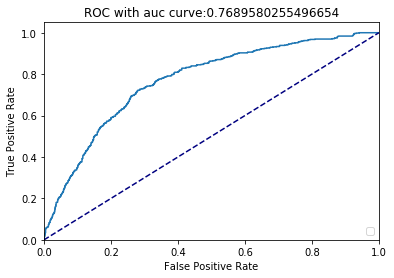

In [43]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.title('ROC with auc curve:{}'.format(roc_auc_score(y_test,y_pred_probs)))
plt.show()